Import the required libraries

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

Import the data set, ‘insurance’. The column ‘charges’ should be considered as your target 
label. 

In [78]:
Insurance = pd.read_csv('insurance.csv')

In [79]:
Insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Explore the data using at least 3 data exploratory tools of your choosing in pandas and 
interpret your observation in a markdown cell of what form of predictive analysis that can 
be conducted on the data.

In [80]:
Insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


We seem not to be missing any data, which is a good thing. Two sets of binary features - Sex and Smoker. Charges, which is the traget is a continuous data set, hence it is required that we carry out a regression analysis.

In [81]:
Insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [82]:
Insurance.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

Further evidence that we do not have missing values. Reason to celebrate!

In [83]:
Insurance['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

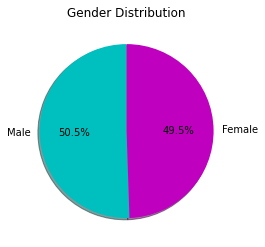

In [84]:
slices = Insurance['sex'].value_counts()
gender = ['Male','Female']
cols = ['c','m']

plt.pie(slices,
        labels=gender,
        colors=cols,
        startangle=90,
        shadow= True,
        autopct='%1.1f%%')

plt.title('Gender Distribution')
plt.show()

There is a good distribution of Males and Females - almost equal of each.

Visualize the age distribution for the column ‘age’ and comment on the results in a 
markdown cell as well. (Ensure your visualization is of an appropriate size for effective 
analysis) 

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


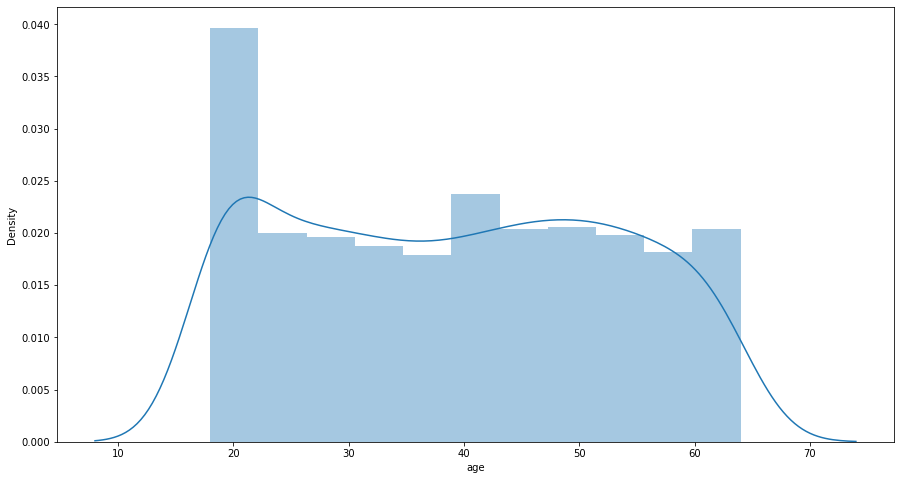

In [85]:
plt.figure(figsize=(15,8))
x = Insurance.age
ax = sns.distplot(x)

There is a normal distribution in the age feature

Isolate all the continuous and discrete columns into their respective lists named 
‘numerical_continuous’ and ‘numerical_discrete’ respectively. 

In [86]:
Insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [87]:
Numerical = [var for var in Insurance.columns if Insurance[var].dtype!='O']
print('There are {} numerical variables namely:'.format(len(Numerical)))
print(Numerical)

There are 4 numerical variables namely:
['age', 'bmi', 'children', 'charges']


In [88]:
numerical_discrete = []

for var in Numerical:
    if len(Insurance[var].unique())<20:
        print(var, ' values: ', Insurance[var].unique())
        numerical_discrete.append(var)
print()
print('There are {} discrete variables'.format(len(numerical_discrete)))

children  values:  [0 1 3 2 5 4]

There are 1 discrete variables


In [89]:
numerical_continuous = [var for var in Numerical if var not in numerical_discrete]
print('There are {} continuous variables namely:'.format(len(numerical_continuous)))
print(numerical_continuous)

There are 3 continuous variables namely:
['age', 'bmi', 'charges']


Visually identify if there is presence of any outliers in the numerical_continuous columns 
and resolve them using a zscore test and a threshold of your choosing.

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

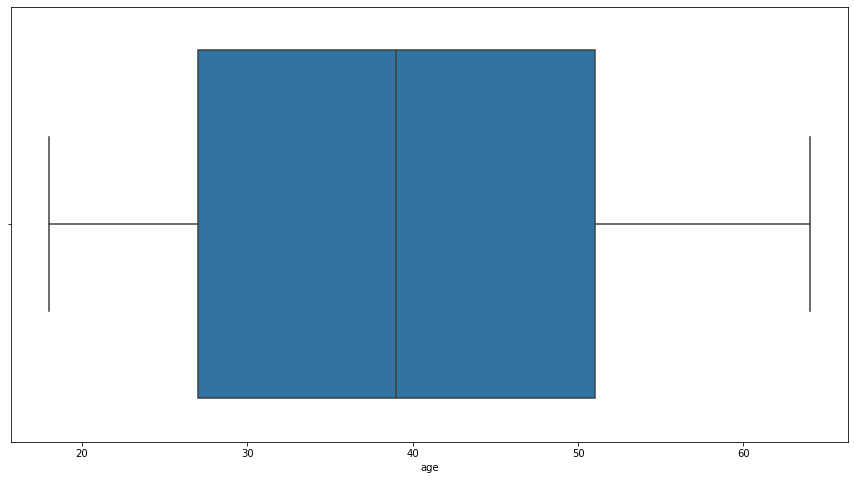

In [90]:
plt.figure(figsize=(15,8))
sns.boxplot(Insurance.age)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

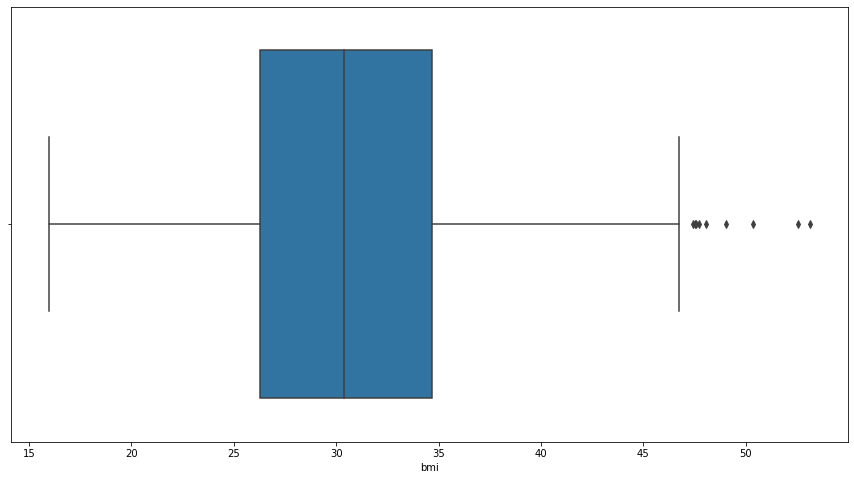

In [91]:
plt.figure(figsize=(15,8))
sns.boxplot(Insurance.bmi)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='charges'>

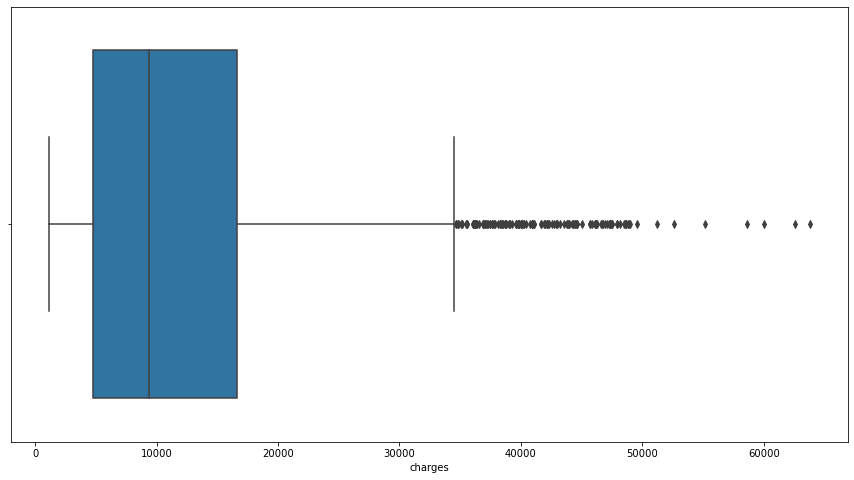

In [92]:
plt.figure(figsize=(15,8))
sns.boxplot(Insurance.charges)

So we have outliers in the bmi and charges column. The age column seems to be fine.

In [93]:
def remove_outliers(col):
    q25 = col.quantile(0.25)
    q75 = col.quantile(0.75)
    iqr = q75 - q25
    cutoff = 1.5*iqr
    lower = q25 - cutoff
    upper = q75 + cutoff
    return lower, upper

lower, upper = remove_outliers(Insurance.bmi)
Insurance = Insurance.loc[(Insurance.bmi>lower) & (Insurance.bmi<upper)]

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

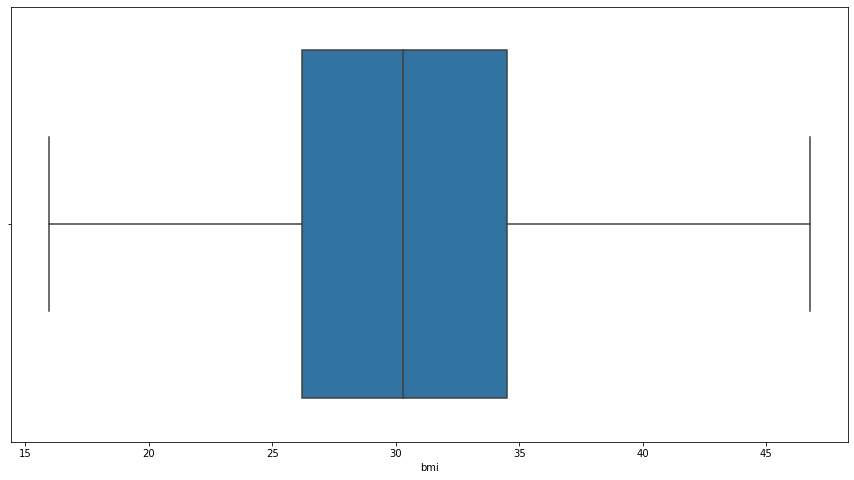

In [94]:
plt.figure(figsize=(15,8))
sns.boxplot(Insurance.bmi)

In [95]:
lower, upper = remove_outliers(Insurance.charges)
Insurance = Insurance.loc[(Insurance.charges>lower) & (Insurance.charges<upper)]

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='charges'>

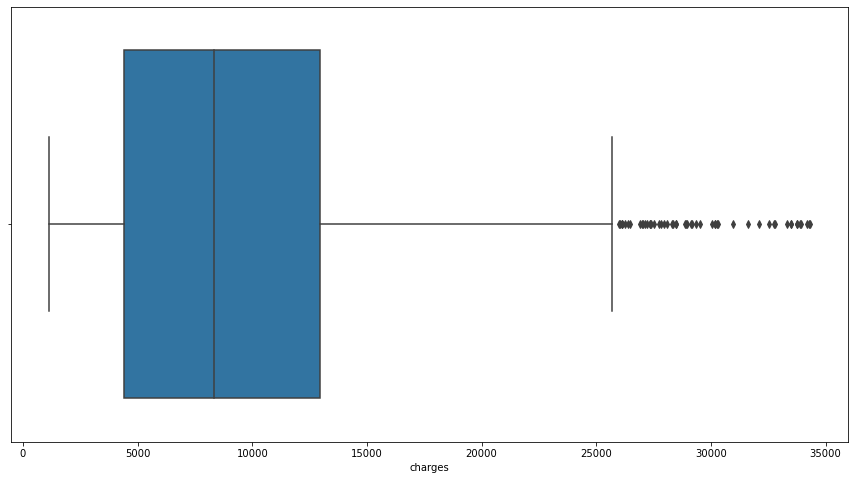

In [96]:
plt.figure(figsize=(15,8))
sns.boxplot(Insurance.charges)

In [97]:
data = Insurance.charges
mean = np.mean(data)
std = np.std(data)
print('mean of the dataset is', mean)
print('std. deviation is', std)

mean of the dataset is 9901.104142106635
std. deviation is 7184.36189518745


In [98]:
threshold = 3
outlier = []
for i in data:
    z = (i-mean)/std
    if z > threshold:
        outlier.append(i)
print('outlier in dataset is', outlier)

outlier in dataset is [34303.1672, 32734.1863, 33750.2918, 32548.3405, 31620.001060000002, 33471.97189, 32787.458589999995, 33732.6867, 32108.662819999998, 33475.81715, 33907.547999999995, 34166.273, 33307.5508, 34254.05335, 33900.653]


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='charges'>

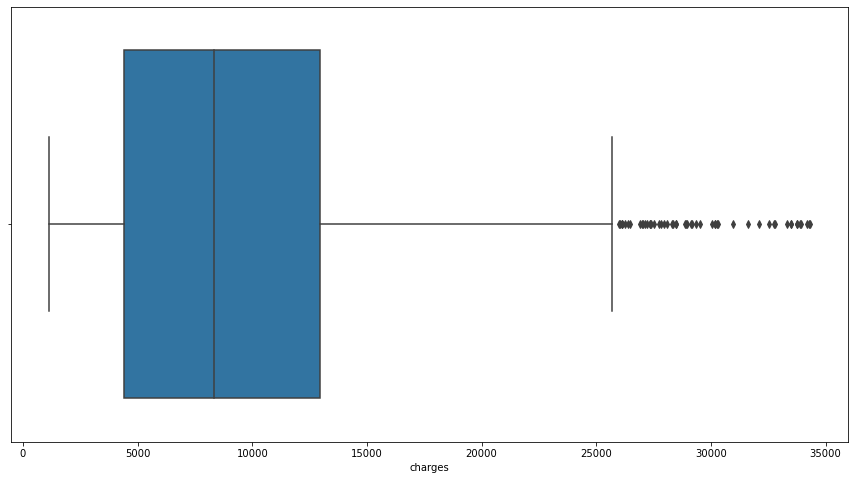

In [99]:
plt.figure(figsize=(15,8))
sns.boxplot(Insurance.charges)

Isolate all the categorical column names into a list named ‘categorical’.

In [100]:
categorical = [var for var in Insurance.columns if Insurance[var].dtype=='O']
print('There are {} categorical variables namely:'.format(len(Numerical)))
print(categorical)

There are 4 categorical variables namely:
['sex', 'smoker', 'region']


In [101]:
numerical_discrete

['children']

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='children'>

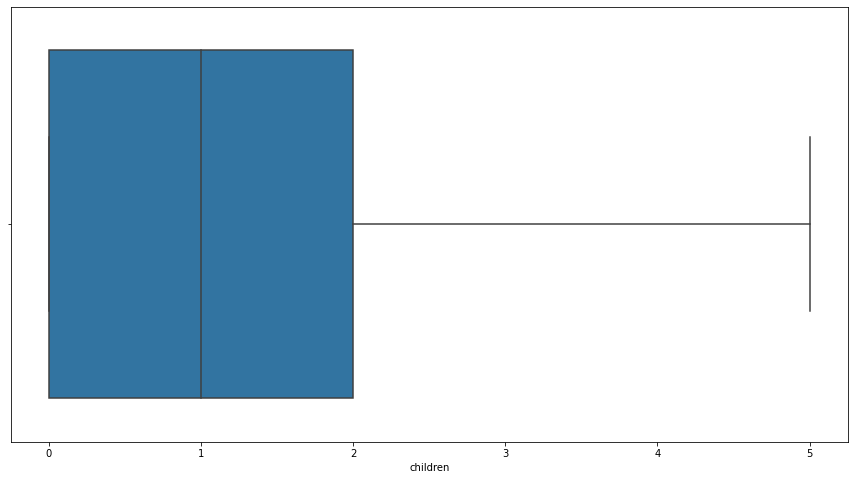

In [102]:
plt.figure(figsize=(15,8))
sns.boxplot(Insurance.children)

In [103]:
categorical

['sex', 'smoker', 'region']

In [104]:
Insurance.region.value_counts()

northwest    305
southeast    301
northeast    295
southwest    290
Name: region, dtype: int64

In [105]:
from sklearn.preprocessing import LabelEncoder

In [106]:
le = LabelEncoder()

In [107]:
Insurance.loc[:, 'sex'] = le.fit_transform(Insurance.loc[:, 'sex'])

In [108]:
Insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [109]:
Insurance.loc[:, 'smoker'] = le.fit_transform(Insurance.loc[:, 'smoker'])

In [110]:
Insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [111]:
Insurance.loc[:, 'region'] = le.fit_transform(Insurance.loc[:, 'region'])

In [112]:
Insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex'>

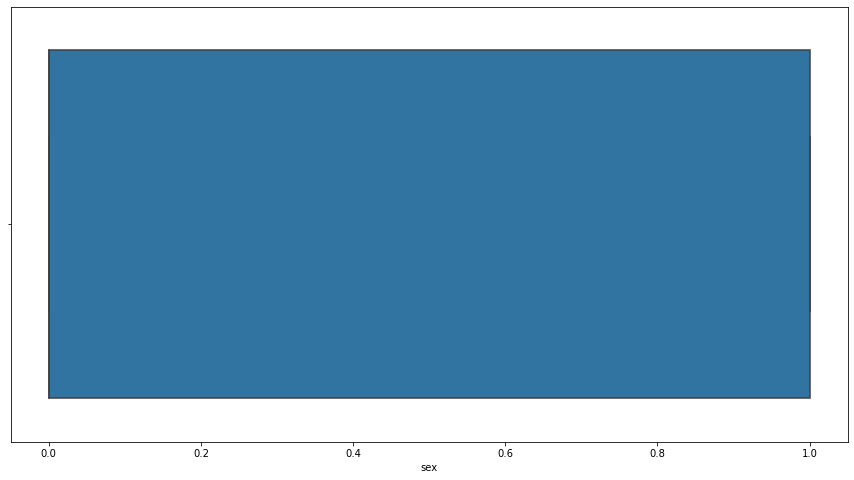

In [113]:
plt.figure(figsize=(15,8))
sns.boxplot(Insurance.sex)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='region'>

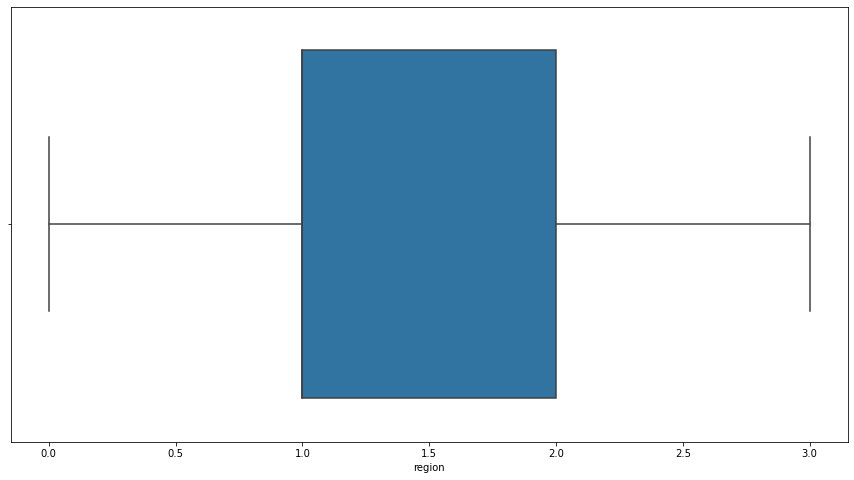

In [114]:
plt.figure(figsize=(15,8))
sns.boxplot(Insurance.region)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoker'>

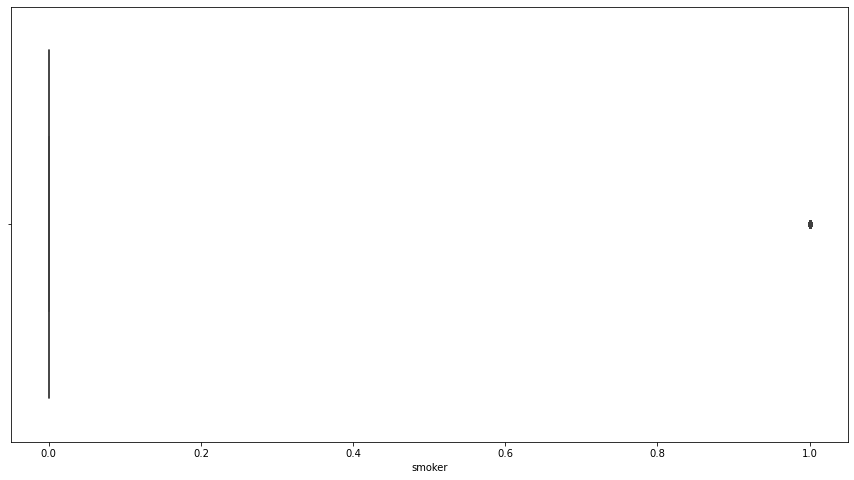

In [115]:
plt.figure(figsize=(15,8))
sns.boxplot(Insurance.smoker)

<AxesSubplot:>

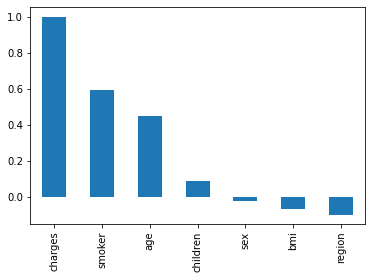

In [116]:
Insurance.corr()['charges'].sort_values(ascending = False).plot(kind='bar')

Sex seems to have the least corelation with the charges. So it is the column I would drop to remain with 5 features.

In [117]:
Insurance = Insurance.drop('sex', axis=1)

In [118]:
Insurance.head()

,age,bmi,children,smoker,region,charges
0,19,27.900,0,1,3,16884.92400
1,18,33.770,1,0,2,1725.55230
2,28,33.000,3,0,2,4449.46200
3,33,22.705,0,0,1,21984.47061
4,32,28.880,0,0,1,3866.85520


In [119]:
from sklearn.model_selection import train_test_split

In [120]:
X = Insurance.iloc[:,:-1]

In [121]:
y = Insurance.iloc[:,5]

In [122]:
X.head()

,age,bmi,children,smoker,region
0,19,27.900,0,1,3
1,18,33.770,1,0,2
2,28,33.000,3,0,2
3,33,22.705,0,0,1
4,32,28.880,0,0,1


In [123]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [124]:
y = pd.DataFrame(y)

In [125]:
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


Slice the selected feature columns and the labels into the training and testing set. Also 
ensure your features are normalized.

The target feature will be modelled with log transformation
Reasons for using log transformations Convenience: A transformed scale may be as natural as the original scale and more convenient for a specific purpose like percentages rather than original data. This is key in standardization Reducing skewness: A transformation may be used to reduce skewness. A distribution that is symmetric or nearly so is often easier to handle and interpret than a skewed distribution. Equal spreads: A transformation may be used to produce approximately equal spreads, despite marked variations in level, which again makes data easier to handle and interpret. Linear relationships: When looking at relationships between variables, it is often far easier to think about patterns that are approximately linear than about patterns that are highly curved. Additive relationships: Relationships are often easier to analyse when additive rather than multiplicative

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [130]:
X_train.head()

,age,bmi,children,smoker,region
532,59,29.700,2,0,2
245,54,30.020,0,0,1
345,34,29.260,3,0,2
457,57,30.495,0,0,1
1085,39,18.300,5,1,3


In [131]:
X_test.head()

,age,bmi,children,smoker,region
563,50,44.77,1,0,2
458,56,39.60,0,0,3
302,56,37.51,2,0,2
110,54,33.63,1,0,1
1166,57,40.37,0,0,2


In [132]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 952 entries, 532 to 659
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       952 non-null    int64  
 1   bmi       952 non-null    float64
 2   children  952 non-null    int64  
 3   smoker    952 non-null    int32  
 4   region    952 non-null    int32  
dtypes: float64(1), int32(2), int64(2)
memory usage: 37.2 KB


In [133]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239 entries, 563 to 1119
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       239 non-null    int64  
 1   bmi       239 non-null    float64
 2   children  239 non-null    int64  
 3   smoker    239 non-null    int32  
 4   region    239 non-null    int32  
dtypes: float64(1), int32(2), int64(2)
memory usage: 9.3 KB


Use at least 4 different regression based machine learning methods and use the training and testing cross accuracy and divergence to identify the best model.

Using XG Boost

In [129]:
#import the XGBOOST model
import xgboost as xgb
# to assist to evaluate the model, import the evaluators
from sklearn.metrics import mean_squared_error
from math import sqrt
#instantiate the model to a variable called xgb_model
xgb_model = xgb.XGBRegressor()

eval_set = [(X_test, np.log(y_test))]
xgb_model.fit(X_train, np.log(y_train), eval_set=eval_set, verbose=False)
#Predict training target
pred = xgb_model.predict(X_train)
print('xgb train mse: {}'.format(mean_squared_error(y_train, np.exp(pred))))
print('xgb train rmse: {}'.format(sqrt(mean_squared_error(y_train, np.exp(pred)))))
print()
pred = xgb_model.predict(X_test)
print('xgb test mse: {}'.format(mean_squared_error(y_test, np.exp(pred))))
print('xgb test rmse: {}'.format(sqrt(mean_squared_error(y_test, np.exp(pred)))))

xgb train mse: 1548376.9832491935
xgb train rmse: 1244.3379698655801

xgb test mse: 17751565.185981397
xgb test rmse: 4213.260635894888


C:\Users\USER\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Using RandomForestRegressor

In [134]:
#Import the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
#Instantiate the model to variable known as rf_model
rf_model = RandomForestRegressor(n_estimators=1000, max_depth=6)
#Fit the model to the data
rf_model.fit(X_train, np.log(y_train))

pred = rf_model.predict(X_train)
print('rf train mse: {}'.format(mean_squared_error(y_train, np.exp(pred))))
print('rf train rmse: {}'.format(sqrt(mean_squared_error(y_train, np.exp(pred)))))

print()
pred = rf_model.predict(X_test)
print('rf test mse: {}'.format(mean_squared_error(y_test, np.exp(pred))))
print('rf test rmse: {}'.format(sqrt(mean_squared_error(y_test, np.exp(pred)))))

<ipython-input-134-019d57738183>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, np.log(y_train))


rf train mse: 15789073.59635191
rf train rmse: 3973.546727591348

rf test mse: 14329664.601755451
rf test rmse: 3785.4543454855525


Using SVR

In [136]:
# Scale the features
from sklearn.preprocessing import MinMaxScaler
# fit the imported module and instantiate onto variable scaler
scaler = MinMaxScaler()
#  fit  the scaler to the training set data
scaler.fit(X_train) 
#Import the module
from sklearn.svm import SVR
#Instantiate the model to a variable SVR_model
SVR_model = SVR()
#Fit the model onto the data
SVR_model.fit(scaler.transform(X_train), np.log(y_train))
#Predict using the model on the training data
pred = SVR_model.predict(X_train)
print('SVR train mse: {}'.format(mean_squared_error(y_train, np.exp(pred))))
print('SVR train rmse: {}'.format(sqrt(mean_squared_error(y_train, np.exp(pred)))))

print()
#Predict using the test data
pred = SVR_model.predict(X_test)
print('SVR test mse: {}'.format(mean_squared_error(y_test, np.exp(pred))))
print('SVR test rmse: {}'.format(sqrt(mean_squared_error(y_test, np.exp(pred)))))

SVR train mse: 52634593.99313652
SVR train rmse: 7254.97029581352

SVR test mse: 48092559.301495224
SVR test rmse: 6934.879905340483


C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Using Linear Regression - Lasso

In [138]:
#Import the modules
from sklearn.linear_model import LinearRegression, Lasso
#Instantiate the model onto a vriable lin_mod
lin_model = Lasso(random_state=2909, alpha=0.005)
#Fit the model to the training data
lin_model.fit(scaler.transform(X_train), np.log(y_train))

pred = lin_model.predict(scaler.transform(X_train))
print('Lasso Linear Model train mse: {}'.format(mean_squared_error(y_train, np.exp(pred))))
print('Lasso Linear Model train rmse: {}'.format(sqrt(mean_squared_error(y_train, np.exp(pred)))))

print()
pred = lin_model.predict(scaler.transform(X_test))
print('Lasso Linear Model test mse: {}'.format(mean_squared_error(y_test, np.exp(pred))))
print('Lasso Linear Model test rmse: {}'.format(sqrt(mean_squared_error(y_test, np.exp(pred)))))

Lasso Linear Model train mse: 34157819.416152924
Lasso Linear Model train rmse: 5844.469130396098

Lasso Linear Model test mse: 26352355.9867714
Lasso Linear Model test rmse: 5133.454586024055


Lower values of RMSE indicate better fit. Random Forest has the lowest rmse on the test data compared to the other three. It is the model we will apply


In [147]:
rf_model.score(X_train,np.log(y_train))

0.8145308528578444

In [148]:
rf_model.score(X_test,np.log(y_test))

0.8026925104685523

In [149]:
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=2,
                              cv=2,
                              verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train, np.log(y_train))

Fitting 2 folds for each of 2 candidates, totalling 4 fits


C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was pa

RandomizedSearchCV(cv=2,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [150]:
rs_model.best_params_


{'n_estimators': 60,
 'min_samples_split': 12,
 'min_samples_leaf': 1,
 'max_features': 1,
 'max_depth': None}

In [151]:
model = RandomForestRegressor(n_estimators=60, min_samples_split=12,min_samples_leaf=1,max_features=1)

In [153]:
model.fit(X_train, np.log(y_train))

y_pred = model.predict(X_test)

<ipython-input-153-2f8ead87d247>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, np.log(y_train))


In [154]:
model.score(X_train,np.log(y_train))

0.8288641787633388

In [155]:
model.score(X_test,np.log(y_test))

0.7820144352848908

In [156]:
print('rf model mse: {}'.format(mean_squared_error(y_test, np.exp(y_pred))))
print('rf model rmse: {}'.format(sqrt(mean_squared_error(y_test, np.exp(y_pred)))))

rf model mse: 16760226.555444727
rf model rmse: 4093.9255678925974


Seems like the initial hyperparameters were better